## Importing Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

## Loading Dataset

In [2]:
df = pd.read_csv('finance loan approval.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [4]:
df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.shape

(367, 12)

In [7]:
df = df.drop('Loan_ID', axis=1)

In [8]:
def show_null_dist():
    cols_with_nulls = df.isna().sum()[lambda s: s > 0].to_dict()
    for col_name, null_count in cols_with_nulls.items():
        percentage_null = null_count / df.shape[0] * 100
        print(f'{col_name} has {percentage_null:.2f}% rows.')

In [9]:
show_null_dist()

Gender has 3.00% rows.
Dependents has 2.72% rows.
Self_Employed has 6.27% rows.
LoanAmount has 1.36% rows.
Loan_Amount_Term has 1.63% rows.
Credit_History has 7.90% rows.


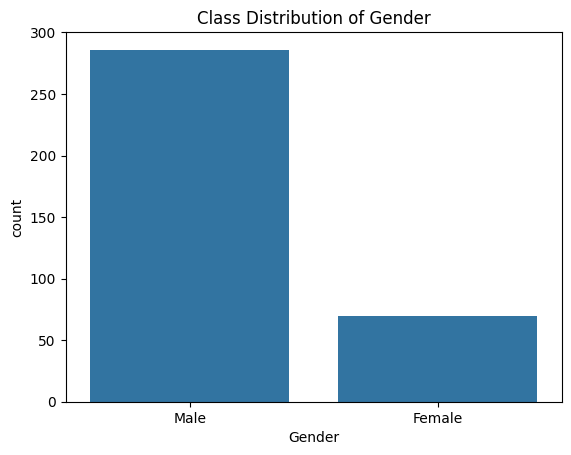

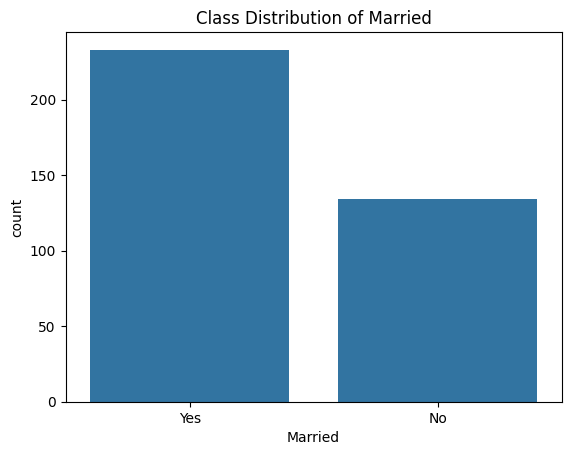

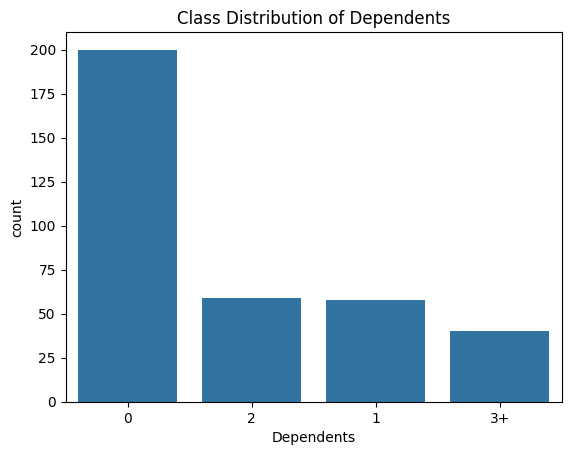

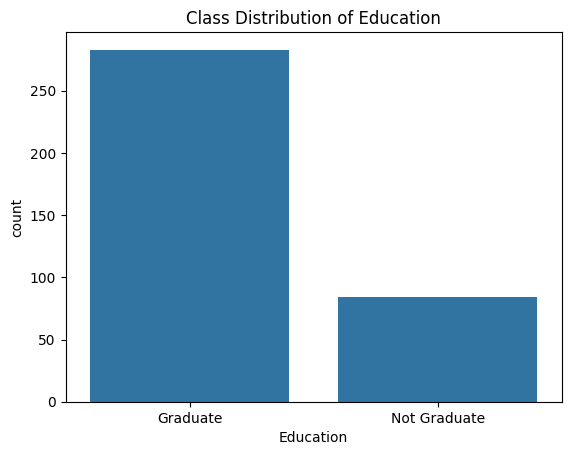

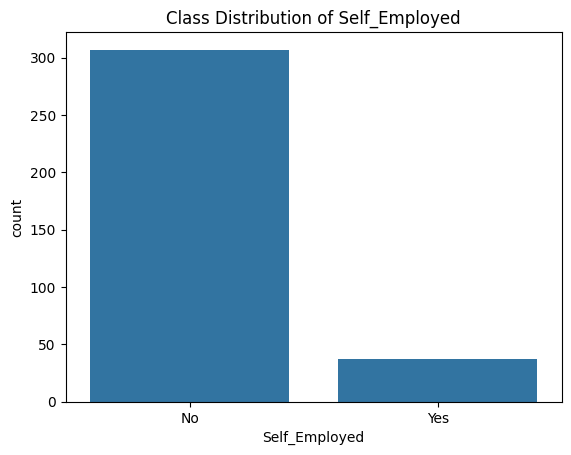

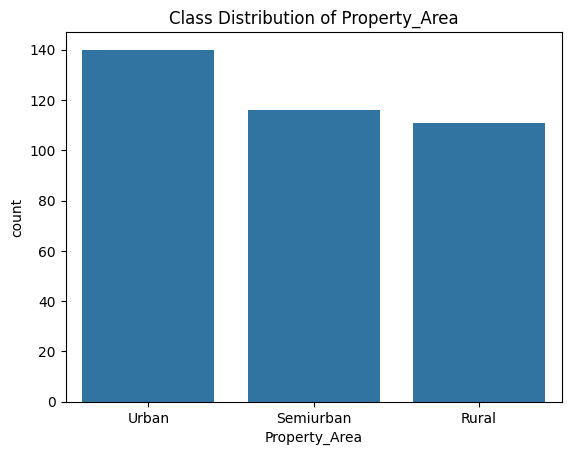

In [10]:
def plot_barchart(categorical_columns):
    for col in categorical_columns:    
        value_counts = df[col].value_counts().reset_index()
        sns.barplot(x=col, y='count', data=value_counts)
        plt.title(f'Class Distribution of {col}')
        plt.show()

categorical_columns = df.select_dtypes('object').columns
plot_barchart(categorical_columns)

## Data Preprocessing 

In [11]:
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [12]:
df[df.select_dtypes(bool).columns] = df.select_dtypes(bool).astype('int64')

In [13]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
2,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
3,2340,2546,100.0,360.0,NaN,1,1,0,1,0,0,0,0,1
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,1,1,0,0,1,1,1,0,1
363,4158,709,115.0,360.0,1.0,1,1,0,0,0,0,0,0,1
364,3250,1993,126.0,360.0,NaN,1,0,0,0,0,0,0,1,0
365,5000,2393,158.0,360.0,1.0,1,1,0,0,0,0,0,0,0


In [14]:
null_columns = [col for col in df.columns if df[col].isna().any]

In [15]:
for col in null_columns:
    mode = df[col].mode()[0]
    df.fillna({col: mode}, inplace=True)

In [16]:
df.isna().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

## Data Preparation and Feature Scaling

In [17]:
X = df.drop('Credit_History', axis=1)
y = df['Credit_History']

In [18]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [20]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.15, random_state=42, stratify=y_resampled)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1765, random_state=42, stratify=y_train_full)

## Model Building

In [21]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
y_pred_val = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
print("Classification Report (Validation):\n", classification_report(y_val, y_pred_val))

Validation Accuracy: 0.7956989247311828
Classification Report (Validation):
               precision    recall  f1-score   support

         0.0       0.81      0.76      0.79        46
         1.0       0.78      0.83      0.80        47

    accuracy                           0.80        93
   macro avg       0.80      0.80      0.80        93
weighted avg       0.80      0.80      0.80        93



In [23]:
y_pred_test = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report (Test):\n", classification_report(y_test, y_pred_test))

Test Accuracy: 0.8494623655913979
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.87      0.83      0.85        47
         1.0       0.83      0.87      0.85        46

    accuracy                           0.85        93
   macro avg       0.85      0.85      0.85        93
weighted avg       0.85      0.85      0.85        93



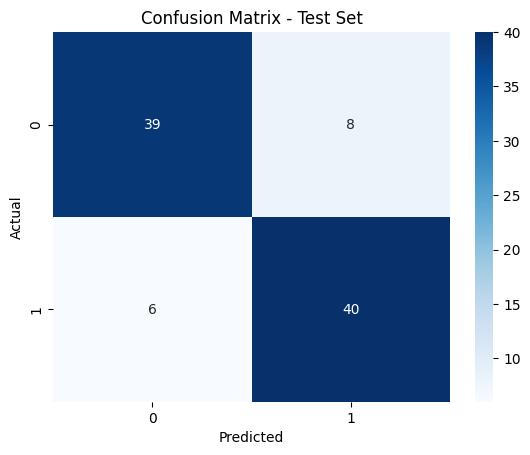

In [24]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()